# Lab 1 : Introduction to Deep Learning and Neural Style Transfer

## About this lab

Deep Learning models often seems like black boxes that no one understands... In fact, we can actually go inside these model to understand what the model learned. Think of it as if you were looking at some coffee grounds and were trying to construe an object from it.

We are going to do some Style Transfer. You know that thing on Snapchat where you can add a Comic Filter on your face... We are basically redoing that kind of style transfer in order to understand what DL is.

Goal on this lab :
* See how a model works
* Import a Pre Trained Model
* Code in class using Python


Alright, let's get started.

<img src="https://i.pinimg.com/originals/16/b2/96/16b296afb78ec57d12c931bc72b42eec.gif">

## Which DL Framework to use

                ### Popular frameworks

Here is an non-exhaustive list of open source Python Framework 

| Software   | **Creator**                                                         | **Initial release** | **Interface**                                                | **Written in**       |
|------------|---------------------------------------------------------------------|---------------------|--------------------------------------------------------------|----------------------|
| Theano     | Montréal University                                                 | 2007                | Python (Keras)                                               | Python               |
| Caffe      | Berkeley Vision and Learning Center                                 | 2013                | Python, MATLAB, C++                                          | C++                  |
| Chainer    | Preferred Networks                                                  | 2015                | Python                                                       | Python               |
| TensorFlow | Google Brain                                                        | 2015                | Python (Keras), C/C++, Java, Go, JavaScript, R, Julia, Swift | C++, Python, CUDA    |
| Keras      | François Chollet                                                    | 2015                | Python, R                                                    | Python               |
| PyTorch    | Adam Paszke, Sam Gross, Soumith Chintala, Gregory Chanan (Facebook) | 2016                | Python, C++, Julia                                           | Python, C, C++, CUDA |
| JAX        | Google Research                                                     | 2018                | Python                                                       | Python, C, C++       |


For now, PyTorch is still the "research" framework and TensorFlow is still the "industry" framework. In fact, many companies are switching into cloud based solutions. Most companies were using Google cloud services. And you can understand quickly why Tensorflow was used a lot (because Tensorflow based Model are easily integrable into an existing Company Architecture based on Google cloud). However it tends to change as more and more companies are switching to Amazon's AWS that can handle many DL frameworks.

<img src="https://preview.redd.it/p62rqqidzi581.png?width=747&format=png&auto=webp&s=9c3b19ecc9c1386f6706f5b03e905280610ee81e" style="max-height: 700px;">

While more job listings seek users of TensorFlow

<img src="https://preview.redd.it/lcvzxrwmik581.png?width=747&format=png&auto=webp&s=e669f33897491225e0e793ae452b7ff64da17dee" style="max-height: 700px;">

If you are interested, [here](https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2022/) a more thorough analysis of the relevant differences between Pytorch and Tensorflow



### Why using Pytorch in this lab ?

As the focus of this lab is on Deep Learning theory and understanding the under-the-hood of Deep Learning models, we will be using [PyTorch](https://pytorch.org/docs/stable/index.html) throughout this lab.

Ideally, you should get exposure to Tensorflow framework (lab 1), and dedicate some time to understanding the differences between the frameworks.


# I - Introducing Deep Learning with a Simple Task



## A Simple Neuron

Let's introduce a Simple Task. 
Given a boolean value (0 or 1), we want the model to invert the input value. 
Example : if the model's input is 0, we want it to output 1.

In order to perform this task, we will need few elements:
* a Dataset
* a Model
* a Training/Testing Loop
* Some hyperparameters

## a - The Simple Dataset and Dataloader

As you know, to train a model you will need data. In practice before choosing/creating a model, we usually have a look on the Dataset. These datas come in the form of labeled or unlabeled data. 

In Pytorch, datasets inherits from the Dataset class. It is a simple class composed of minimum 3 methods :
* __init__ : to initialize the class
* __getitem__ : to retrieve a sample according to a index number
* __len__ : to return the len of the entire Dataset

In our case, we will generate a list of 0 and 1. The __getitem__ method should return the opposite value of the element picked at the given index.

In [12]:
%%time
from torch.utils.data import Dataset
from random import randint

"""
Simple DataSets class which implements torch DataSets Class
"""
class SimpleDataset(Dataset):

  def __init__(self, len_data):  #init random boolean list of random boolean value
    self.len_data = len_data
    self.data = [randint(0,1) for i in range(len_data)] # This list of length len_data is filled with 0 and 1 

  def __getitem__(self,idx): #init data with labels
    # We select as data the value at index idx of the self.data list
    data = self.data[idx]
    label = 1 - self.data[idx]
    # TODO : Return a dictionnary {'data': .., 'label':}
    return {"data":torch.as_tensor(data), 
            "label": torch.as_tensor(label)}

  def __len__(self):
    # Explanation : We know that the total length of the dataset is the length of the self.data attribute
    return len(self.data)

# TODO : Create dataset_train and dataset_test by initializing the Classes. You can choose a big value for the size of the list
len_dataset_train = 10000
len_dataset_test= 1000
dataset_train = SimpleDataset(len_dataset_train)
dataset_test = SimpleDataset(len_dataset_test)
print(dataset_train.data)

[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 

The Dataloader is used to fetch batches of data to send them at the same time to the GPU. A DataLoader needs a batch size. Other attributes of the DataLoader class exists but we won't use them.

In [2]:
%%time
"""
load data gradually as batches
"""
from torch.utils.data import DataLoader
dataset_train = DataLoader(dataset_train, batch_size= 2048)
dataset_test = DataLoader(dataset_test, batch_size= 1000)

CPU times: total: 0 ns
Wall time: 0 ns


## b - The Simple Model

First time coding a neural net ? Let's think a little bit.
Questions : 
* **What kind of task is it ?**
*  **Is one neuron enough to perform the inversion of a boolean ?**
* **Given an input x, a weight b, a bias b and an activation function f, how do we modelize a Single Neuron ?**

Creating a Model in PyTorch is pretty simple. We initalize a Class that inherits from nn.Module. 

It is defined as follows:


```
class Model(nn.Module):
  def __init__(self,...):
    """"
    Defines the model. You can put the input size as a parameter if needed..
    """"
    super().__init__() #to init the main class
    self.layers = ... # defining the model : could be Conv2d, Linear, RNN, LSTM


  def forward(self,x):
    """
    The input x is forwarded through the neural net. 
    """
    output = self.layers(x)
    return output
```

More informations : https://pytorch.org/docs/stable/nn.html



**Using a nn.Parameter, create a single Neuron model.**

In [3]:
%%time
from random import random as rnd
import torch.nn as nn
import torch
class SimpleModel(nn.Module):
    def __init__(self,):
      super().__init__()
      # Note : We initialize randomly the values of the weights and the biases as these are learned during training
      self.w = nn.Parameter(torch.tensor(rnd()), requires_grad =True) # Weight
      # TODO : by looking at the weight parameter (self.w) initialize the bias
      self.b = nn.Parameter(torch.tensor(rnd()), requires_grad =True) # Bias
      # TODO : add a Sigmoid Activation layer
      self.sigmoid = nn.Sigmoid()

    def forward(self,x):
      # TODO : Using the famous formula of a single neuron, compute the value of x1 : the output of the neuron
      x1 = torch.add(torch.mul(x, self.w), self.b)
      # TODO : Pass x1 through the activation layer
      x1 = self.sigmoid(x1)
      return x1

CPU times: total: 0 ns
Wall time: 0 ns


In [6]:
%%time
# TODO : Create an instance of the SimpleModel and print the layers it has using print()
model = SimpleModel()
print(model)

SimpleModel(
  (sigmoid): Sigmoid()
)
CPU times: total: 0 ns
Wall time: 0 ns


## c- The Simple Training

As of now, we are supposed to have the model and the dataset. Hence, we need to create the training loop and initialize some useful object for the training.


The training loop is defined as follows :


```
for epoch in num_epoch : 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):        
        data = data.to(device)
        optimizer.zero_grad()
        outputs = net(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i == ??:
          running_loss= running_loss/??



As you can see, there are some obscure words that we didn't define yet.

### i - Optimizer

Optimizers are algorithms or methods used to minimize an error function (loss function) or to maximize the efficiency of production. A learning rate must be defined. The learning rate handles the step of the Gradient Descent update. Here, we will use stochastic gradient descent (SGD)

In [7]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.01) # stochastic gradient descent for weight and Bias

### ii - Criterion 

This is basically the loss function. It measures the differences between the output and the input. We want to minimize it. 


**Which Loss function will we be using in this Binary Classification Task ?**

In [8]:
# TODO : Initialize a criterion. Choose between BCELoss or MSELoss. More Information in https://pytorch.org/docs/stable/nn.html#loss-functions
criterion = nn.BCELoss() #logLoss: minimizes dif between predicted and actual values, MSE for regression tasks: not suited

### iii - Num Epoch 

The number of epoch corresponds to the number of time, the model will see the samples from the dataset

In [9]:
# TODO : Choose a number of epochs 
# depends on the complexity of the data and the size of the model
# a good rule of thumb is 10-20 for small datasets,
# larger data sets and higher complexity models need more
num_epochs = 15 # mean 10-20

### iv - Device 

Once the model initialized, we prefer accelerating the training. Hence, we send it to the GPU to profit from the parralelisation property of GPUs (Coucou HSP). To send it you have to define a device as follows:

```
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
```
To send your model or data to device : 



```
model = model.to(device) or data = data.to(device)
```




In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### v - Gathering everything under a Loop

Let's gather everything under a Training loop and a Testing loop.
* The training loop will update the weights of the model
* The testing loop will only test the model without updating anything.


**Fill in the blanks**

In [13]:
%%time
# Defining the Training Loop :
# Define Device :
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# TODO : Create an Instance of the Model
model = model.to(device)

# Define your device : 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# TODO : Define your optimizer. Don't forget your learning rate :
lr = 0.01
optimizer = optim.SGD(model.parameters(), lr)

# TODO : Define your criterion :
criterion = nn.BCELoss()

# TODO : Define your number of epochs :
n_epoch = 500

# Initializing some stuff for visualization
loss_train, loss_test = [], []


for epoch in range(n_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataset_train, 0):
        # TODO : Get the inputs. data is a dictionnary with keys : data and label
        inputs, labels = data["data"].to(device), data["label"].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # TODO : Send the input through the model
        outputs = model(inputs)

        # TODO : Compute the loss between the ouputs and the targets
        loss = criterion(outputs, labels.float())

        # update the weights using backward and optimizer
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss train: {running_loss / 2000:.3f}')
            running_loss = 0.0
    loss_train.append(running_loss/i)

    # Explanation : We don't need gradients here as we are not updating anything. This we call torch.no_grad()
    with torch.no_grad():
      for i, data in enumerate(dataset_test, 0):
        # TODO : Get the inputs. data is a dictionnary with keys : data and label
        inputs, labels = data["data"].to(device), data["label"].to(device)

        # TODO : Send the input through the model
        outputs = model(inputs)
        running_loss += loss.item()
        if i % 100 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss test: {running_loss / 2000:.3f}')
            running_loss = 0.0
    loss_test.append(running_loss/i)

print('Finished Training')

[1,    20] loss train: 0.007
[1,   120] loss train: 0.032
[1,   220] loss train: 0.031
[1,   320] loss train: 0.028
[1,   420] loss train: 0.026
[1,   520] loss train: 0.024
[1,   620] loss train: 0.022
[1,   720] loss train: 0.021
[1,   820] loss train: 0.019
[1,   920] loss train: 0.019
[1,  1020] loss train: 0.018
[1,  1120] loss train: 0.017
[1,  1220] loss train: 0.016
[1,  1320] loss train: 0.016
[1,  1420] loss train: 0.015
[1,  1520] loss train: 0.014
[1,  1620] loss train: 0.013
[1,  1720] loss train: 0.013
[1,  1820] loss train: 0.012
[1,  1920] loss train: 0.013
[1,  2020] loss train: 0.012
[1,  2120] loss train: 0.011
[1,  2220] loss train: 0.011
[1,  2320] loss train: 0.011
[1,  2420] loss train: 0.010
[1,  2520] loss train: 0.010
[1,  2620] loss train: 0.009
[1,  2720] loss train: 0.009
[1,  2820] loss train: 0.009
[1,  2920] loss train: 0.009
[1,  3020] loss train: 0.008
[1,  3120] loss train: 0.008
[1,  3220] loss train: 0.008
[1,  3320] loss train: 0.008
[1,  3420] los

KeyboardInterrupt: 

### vi - Let's visualize some stuff

As you could see we have to lists where we logged loss values each epochs. Let's plot them to see if the model is overfitting/underfitting.
* **What can you tell on your model's training ?**
* **Can we actually tell if the model is overfitting or not ? Why ?**

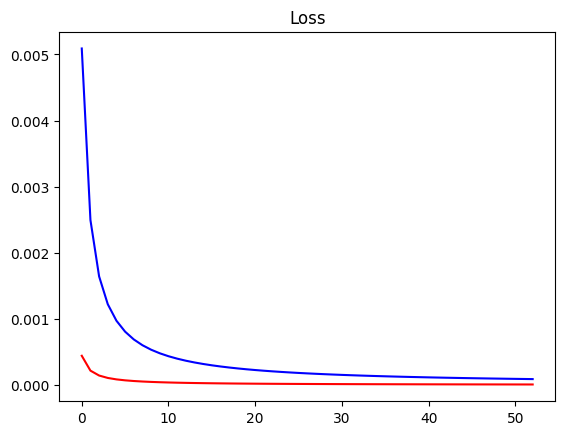

In [14]:
from matplotlib import pyplot as plt
plt.title('Loss')
plt.plot(loss_test, c = "blue")
plt.plot(loss_train, c = "red")

# II - Neural Style Transfer

## Objective of Style Transfer

If you ever wished to paint your house like Van Gogh, put away your paintbrushes and take out the gpu because Style Transfer also referred to as Neural Style Transfer (NST) allows you to create such Art using deep learning.

<img src="https://miro.medium.com/max/767/1*B5zSHvNBUP6gaoOtaIy4wg.jpeg">

This technique was first outlined in Leon A. Gatys’ paper : [A Neural Algorithm of Artistic Style](https://arxiv.org/abs/1508.06576)

In this lab, you will learn how to compose images in the style of another image by implementing NST using pytorch. 


## Principle

<img src="https://sp-ao.shortpixel.ai/client/to_webp,q_glossy,ret_img/https://godatadriven.com/wp-content/images/how-to-style-transfer/style-transfer-example.jpg">


The principle is simple: 

The network has two inputs:
* A content Image (C)
* A style Image (SD)

and output

* A generated Image (G)

We define two distances, one for the content ($D_{CD}$) and one for the style ($D_{SD}$).
* $D_{CD}$  measures how different the content is between two images
* $D_{SD}$ measures how different the style is between two images. 

Finally, we take a third image, the input, and transform it to minimize both its content-distance with the content-image and its style-distance with the style-image.



## Theory

Let 
* $\vec{p}$ be the content image
* $\vec{a}$ be the style image
* $\vec{x}$ the image that is generated 
* $P^{l}$ be the representation of $\vec{p}$ in layer $l$
* $A^{l}$ be the representation of $\vec{a}$ in layer $l$
* $F^{l}$ be the representation of $\vec{x}$ in layer $l$

A given input image $\vec{x}$ is encoded in each layer of the $\mathrm{CNN}$ by the filter responses to that image. A layer with $N_{l}$ distinct filters has $N_{l}$ feature maps each of size $M_{l}$, where $M_{l}$ is the height $H_{l}$ times the width $W_{l}$ of the feature map. So the responses in a layer $l$ can be stored in a matrix $F^{l} \in \mathcal{R}^{N_{l} \times M_{l}}$
* $F_{i j}^{l}$ is the activation of the $i^{t h}$ filter at position $j$ in layer $l$.

**Content Loss**

The content loss is defined as a squared-error loss between the two feature representations
$$
\mathcal{L}^{l}_{\text {content }}(\vec{p}, \vec{x})=\text {MSE}\left(F^{l}, P^{l} \right) =\frac{1}{N_{l} M_{l}} \sum_{i, j}\left(F_{i j}^{l}-P_{i j}^{l}\right)^{2}
$$

$$
\mathcal{L}_{\text {content }}(\vec{p}, \vec{x})=\sum_{l=0}^{L} w^{l}_{\text {content }} \mathcal{L}^{l}_{\text {content }}(\vec{p}, \vec{x})
$$

Gradient descent is performed on a white noise image to find another image that matches the feature responses of the content image.

Thus we can change the initially random image $\vec{x}$ until it generates the same response in a certain layer of the CNN as the content image $\vec{p}$

**Style Loss**

A style representation is defined as the correlations between the different filter responses. These feature correlations are given by the
Gram matrix 

$$G^{l} \in \mathcal{R}^{N_{l} \times N_{l}}$$

where $G_{i j}^{l}$ is the inner product between the vectorised feature map $i$ and $j$ in layer $l:$
$$
G_{i j}^{l}=\frac{1}{M_{l}} \sum_{k} F_{i k}^{l} F_{j k}^{l}
$$

To generate a texture that matches the style of a given image, gradient descent is performed from a white noise image to find another image that matches the style representation of the style image. 

This is done by minimising the mean-squared distance between the entries of the Gram matrix from the style image and the Gram matrix of the image to be generated:

$$
\mathcal{L}^{l}_{\text {style }}(\vec{a}, \vec{x})=\text {MSE}\left(G^{l}, A^{l} \right)=\frac{1}{N_{l}^{2}} \sum_{i, j}\left(G_{i j}^{l}-A_{i j}^{l}\right)^{2}
$$

$$
\mathcal{L}_{\text {style }}(\vec{a}, \vec{x})=\sum_{l=0}^{L} w^{l}_{\text {style }} \mathcal{L}^{l}_{\text {style }}(\vec{a}, \vec{x})
$$

**Loss**

The global loss function that is minimised is

$$
\mathcal{L}_{\text {total }}(\vec{p}, \vec{a}, \vec{x})=\alpha \mathcal{L}_{\text {content }}(\vec{p}, \vec{x})+\beta \mathcal{L}_{\text {style }}(\vec{a}, \vec{x})
$$

where $\alpha$ and $\beta$ are the weighting factors for content and style reconstruction respectively




<img src="https://i.imgflip.com/64t8v0.jpg" height=400>

## Coding the Neural Style Transfer

### Importing all the lib needed

In [15]:
import sys

In [16]:
sys.path # had a problem with the libraries so I had to check if the executable path is correct

['C:\\Users\\Mon PC\\DataspellProjects\\AI LAB 1',
 'C:\\Users\\Mon PC\\DataspellProjects\\AI LAB 1',
 'C:\\ProgramData\\Anaconda3\\envs\\BookEx\\python39.zip',
 'C:\\ProgramData\\Anaconda3\\envs\\BookEx\\DLLs',
 'C:\\ProgramData\\Anaconda3\\envs\\BookEx\\lib',
 'C:\\ProgramData\\Anaconda3\\envs\\BookEx',
 '',
 'C:\\Users\\Mon PC\\AppData\\Roaming\\Python\\Python39\\site-packages',
 'C:\\Users\\Mon PC\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32',
 'C:\\Users\\Mon PC\\AppData\\Roaming\\Python\\Python39\\site-packages\\win32\\lib',
 'C:\\Users\\Mon PC\\AppData\\Roaming\\Python\\Python39\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\envs\\BookEx\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\envs\\BookEx\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\envs\\BookEx\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\envs\\BookEx\\lib\\site-packages\\Pythonwin']

In [17]:
sys.executable

'C:\\ProgramData\\Anaconda3\\envs\\BookEx\\python.exe'

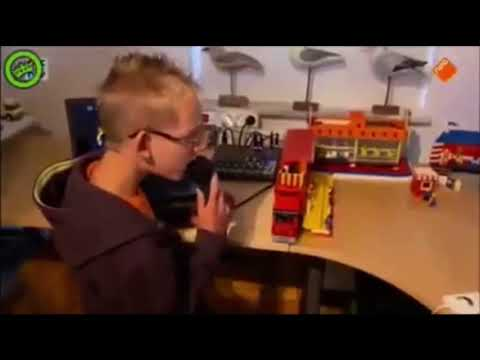

In [1]:
%matplotlib inline # show using the notebook integrated library

# usual python lib
import copy
import skimage
import numpy as np
import cv2
import matplotlib.pyplot as plt

# torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# tensorboard
from torch.utils.tensorboard import SummaryWriter

# torchvision for data augmentation and predefined models
import torchvision.transforms as transforms
import torchvision.models as models

from IPython.display import YouTubeVideo
from PIL import Image
from skimage import io
#from google.colab.patches import cv2_imshow

YouTubeVideo("KbDFCn29BGE")

In Pytorch we need to choose which device to run the network on and import the content and style images. Running the neural transfer algorithm on large images takes longer and will go much faster when running on a GPU. We can use `torch.cuda.is_available()` to detect if there is a GPU available. Next, we set the `torch.device` for use throughout the tutorial. Also the `.to(device)` method is used to move tensors or modules to a desired device.


In [1]:
print(torch.cuda.is_available())
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #python library accesssing the GPU calculus power


NameError: name 'torch' is not defined

### Inputing image

DeepLearning without data won't do much. So let's start by feeding data.


In order to send the images through the models, we need to apply some transformations. Have a look at : https://pytorch.org/vision/stable/transforms.html
* Define a `loader` which is a Compose transformation that resizes the image to 512x512 size and converts the image to a Tensor.
* Define `unloader` that convert a tensor to a PIL Image

In [3]:
# using a small size if no gpu
imsize = 512 if torch.cuda.is_available() else 128 # reduce calculus if cuda not available

# TODO : Resize the Input Image to size 512,512
# TODO : Transform into Tensor
loader = transforms.Compose([
    transforms.Resize((512, 512)), # TODO
    transforms.ToTensor() # TODO
])

# TODO : Convert to a PIL Image
unloader = transforms.ToPILImage() # TODO

Here some image utilies already implemented for you

In [4]:
def image_loader(url):
    image_cv2_bgr = skimage.io.imread(url)
    # convert it to RGB
    #image_cv2_rgb = cv2.cvtColor(image_cv2_bgr, cv2.COLOR_BGR2RGB)
    # convert it to a PIL Image
    image = Image.fromarray(image_cv2_bgr)
    # Fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    # return the image to right device and type
    return image.to(device, torch.float)

def image_unloader(tensor):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    return image

def tensors_show(tensors, titles=None):
    ''' display a list of tensors '''
    n = len(tensors)
    assert titles is None or len(titles) == n, "Titles should have the same length as tensors"
    fig, axs = plt.subplots(1, n)
    for i, (ax, tensor) in enumerate(zip(axs, tensors)):
        image = image_unloader(tensor)
        ax.imshow(image)
        title = titles[i] if titles is not None else f'Image {i}'
        ax.set_title(title)
        ax.set_axis_off()

You can choose whatever content and style image you like as long as they have the same width and height.

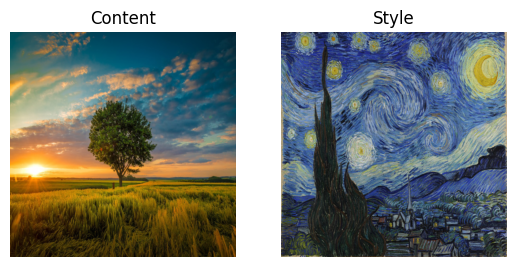

In [20]:
content_url = "https://img.freepik.com/photos-gratuite/prise-vue-au-grand-angle-seul-arbre-poussant-sous-ciel-assombri-pendant-coucher-soleil-entoure-herbe_181624-22807.jpg?w=900&t=st=1678959104~exp=1678959704~hmac=092ff355158681812426a27a7095fb1f2e179e1a349d021d90e60ccbe2d6fb6d"

style_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg/1024px-Van_Gogh_-_Starry_Night_-_Google_Art_Project.jpg"


content_image = image_loader(content_url)
style_image = image_loader(style_url)

tensors_show(
    [content_image, style_image],
    titles=['Content', 'Style']
)

### Defining Losses

So we need to define two losses 
* StyleLoss
* ContentLoss

***Some explanation***

* When you learn to differentiate Pikachu from Jigglypuff, you build a representation where features (forms, texture, colors...) are extracted from the objects.
* For a neural net, when classification is performed, images (in other words bunch of pixels) are used to construct that type of representation by extracting features from the input image. From image, the model creates a representation.

When training a model using ConvNets, they develop an understanding of the objects features. The more layers you have, the more complex the extracted features will be. 

Thus, we can separate the representation with the content (pixel value) and style (texture informations). So to compute the style and the content, we need to look at different intermediate layers of our model.


Well to sum up :     
* Extracted Features are not the same in the earlier and later layers of the model


#### Content Loss

Imagine that you have a neural net composed of layers. We need a function that can represent the content of a layer. In other words we want to compute the distance between the oinput image at layer L and the content image at layer L. In other words, how far our Input Image is from the Content Image.

* What it the name of this distance ?



In [6]:
def content_loss(a, b):
    a_gram = gram_matrix(a)
    b_gram = gram_matrix(b)
    return  F.mse_loss(a_gram,b_gram) # TODO

#### Style Loss

The style loss is used to compute the style of a layer. Hmmm what does it mean ? We want to use a feature space designed to capture texture information. 
* How can we compute that ?

The style of an image can be computed using the mean and the correlation accross feature maps. In fact, we are going to compute the Gram Matrix of a layer. Style Features tend to be in deeper layers of the network.

* Define a Gram Matrix function (1rst year course, Analyse de Fourier 1, chp2 : Espace de Hilbert) that returns a Gram Matrix on an input.

* Do we need some normalization ? If yes, why ?

<img src ="https://github.com/enggen/Deep-Learning-Coursera/raw/1407e19c98833d2686a0748db26b594f3102301e/Convolutional%20Neural%20Networks/Week4/Neural%20Style%20Transfer/images/NST_GM.png">


So for some explanation, the Gram Matrix compares how a bunch of vectors ($v_1, v_2...$) are similar by computing their dot product. In our case, it computes how active a filter is. It means that for the different types of features existing in the model, the Gram Matrix computes :
* in the diagonal, the different types of features
* in the non diagonal, how different the features are.

Let's define a Style Loss 

The Style Loss returns the distance between the Gram Matrix of the target and the Input.

In [7]:
def gram_matrix(input):
    ''' compute the normalized gram matrix of input tensor of dim 4'''
    # batch_size : batch size (=1)
    # n_C : number of feature maps
    # (n_W, n_H) : dimensions of a f. map (N=n_W*n_H)
    batch_size, n_C, n_H, n_W = input.size()

    # reshape input of size (batch_size, n_C, n_W, n_H)
    # to features of shape (batch_size * n_C, n_W * n_H)
    # features should be a matrix (2 dim)
    features = input.view(batch_size * n_C, n_W * n_H) # TODO


    # compute the gram product
    # G should be of shape (batch_size * n_C, batch_size * n_C)
    G =  torch.mm(features, features.t()) # TODO

    # 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    G = G / (batch_size * n_C * n_W * n_H) # TODO

    return G

def style_loss(a, b):
    a_gram = gram_matrix(a)
    b_gram = gram_matrix(b)
    return  F.mse_loss(a_gram,b_gram) # TODO


### Importing a PreTrained Model

Ok now that we have defined our loss, we need something to test in on. Let's import a pretrained model.

We will follow the paper, and load VGG19 model.

<img src="https://miro.medium.com/max/1400/1*6U9FJ_se7SIuFKJRyPMHuA.png">

As a Deep Learning Engineer, you'll often use a model that was already trained for a specific task. Let's import VGG19. TorchVision has a huge library of model that could be loaded with pretrained weights.

* Import Pretrained VGG19 model. Have a look at : https://pytorch.org/vision/stable/models.html

Don't forget to add .eval() at the end as you do not want to change any weight of this model.

Let's have a look on what composes a VGG19 Model.
* Name every Child Module of the VGG19 model.

In fact, we won't need every layer of this model. 
* Assign only the 'feature' extractor to your model.

Don't forget to put your model into evaluation mode. 
* What is evaluation mode ? What happens to the model's weights ?

Print the model and make sure that you kept only the feature extractor.

In [8]:
# load the pretrained vgg19 model
cnn = models.vgg19(pretrained=True) # TODO


# keep only its 'features' part
cnn = cnn.features # TODO

# send the model to the device
cnn = cnn.to(device) # TODO

# enable evaluation mode
cnn = cnn.eval() # TODO 

# display each layers
for i, layer in enumerate(cnn.children()):
    print(i, layer)

# verification, the assertion should not be raised !
assert isinstance(layer, nn.MaxPool2d)

C:\Users\Mon PC\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Mon PC\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


0 Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
1 ReLU(inplace=True)
2 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
3 ReLU(inplace=True)
4 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
5 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
6 ReLU(inplace=True)
7 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
8 ReLU(inplace=True)
9 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
10 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
11 ReLU(inplace=True)
12 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
13 ReLU(inplace=True)
14 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
15 ReLU(inplace=True)
16 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
17 ReLU(inplace=True)
18 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
19 Conv2d(256, 512, kernel_size=(3, 3)

* From which layer (index and type) comes the following feature ?
* `print` and analyze its shape


In [9]:
feature = cnn(content_image)

# TODO
print( feature.shape )

torch.Size([1, 512, 16, 16])


### Implementing the features extractor

When using a pretrained model, one should normalized inputs using the same weight and std. Using the mean `(0.485, 0.456, 0.406)` and std `(0.229, 0.224, 0.225)`of Imagenet is a common practice. They are calculated based on millions of images. If you want to train from scratch on your own dataset, you can calculate the new mean and std. Otherwise, using the Imagenet pretrained model with its own mean and std is recommended.

* Why the mean and std comes with 3 values ?

We want to be able to extract different feature with `FeaturesModel` class.
The `forward` shound returns a dict with each feature from layers defined by `registered_layers`

For instance, for `registered_layers=['conv_2', 'conv_5']`, the forward should return a dictionary with theses two keys associated to their respective feature: the 2nd Conv2D layer and the 5th Conv2D layer.

they should respectively corresponds to the 5th and 12th layer of vgg19  
```py
...
5 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
...
12 Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
...
```

* Complete IMAGENET_MEAN and IMAGENET_STD. they both should be `3-tuple`
* Question: Why is there 3 values ?
* Question: How they have been obtained ?
* Question: Why do we normalize our image ?
* Complete the normalization in the `forward` method


In [10]:
IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406]) # TODO
IMAGENET_STD  = torch.tensor([0.229, 0.224, 0.225]) # TODO
import torchvision
class FeaturesModel(nn.Module):

    def __init__(self,
                 input_model,
                 registered_layers=[],
                 mean = IMAGENET_MEAN,
                 std  = IMAGENET_STD,
                 debug=False
                 ):
        super().__init__()
        self.registered_layers = registered_layers
        self.mean = torch.tensor(mean).view(-1, 1, 1).to(device)
        self.std = torch.tensor(std).view(-1, 1, 1).to(device)
        self.model = self.convert_model(input_model, registered_layers, debug=debug)

    @staticmethod
    def convert_model(input_model, registered_layers, trim=True, debug=False):
        if debug:
            print('FeaturesModel')
        model = nn.Sequential()

        layers_count = {}
        last_index = None
        for i, layer in enumerate(input_model.children()):
            # create the name
            layer_type = FeaturesModel.get_layer_name(layer)
            index = layers_count.setdefault(layer_type, 0)
            layers_count[layer_type] += 1
            name = f"{layer_type}_{index}"
            if debug:
                print('\t', name)

            model.add_module(name, layer) # add the layer
            if name in registered_layers:
                last_index = i

        # optimization : trim the model
        if trim and last_index is not None:
            model = model[:last_index+1]
        return model

    @staticmethod
    def get_layer_name(layer, raise_on_unknown=False) -> str:
        if isinstance(layer, nn.Conv2d):
            return 'conv'
        elif isinstance(layer, nn.ReLU):
            return f'relu'
        elif isinstance(layer, nn.MaxPool2d):
            # TODO : return the correct string
            return f'maxPool2d'

        elif isinstance(layer, nn.BatchNorm2d):
            # TODO : return the correct string
            return f'BatchNorm2d'
        msg = f'Unrecognized layer: {layer.__class__.name}'
        if raise_on_unknown:
            raise RuntimeError(msg)
        print(msg)
        return 'unkwown'

    def forward(self, input, detach=False):
        # out is the normalized input using self.mean and self.std
        # TODO : Normalize
        out = (input - self.mean) / self.std
        #input - torch.mean(input) / torch.mean(input)

        features = {}
        for name, layer in self.model.named_children():
            out = layer(out)
            if name in self.registered_layers:
                feature = out.clone()
                if detach:
                    feature = feature.detach()
                features[name] = feature
        return features

Instantiate a `FeaturesModel` class with the previous pretrained vgg19 model.
Use the following registered layers:
- conv_2
- relu_4
- pool_3

If `debug=True` you should see every layer that can be used.

* Compare `features` with the previous `feature` outputed by vgg19.

* Which layer should you put in `registered_layers` in order to have the same `feature` as before ?

In [11]:
features_model = FeaturesModel(
    cnn,
    registered_layers= ['conv_2', 'relu_4', 'maxPool2d_3'] , # TODO
    debug=True # to print all the new layer names
)

# display features (dict)
print(type(content_image))
features = features_model(content_image)
for layer, feature in features.items():
    print(layer, feature.shape)

FeaturesModel
	 conv_0
	 relu_0
	 conv_1
	 relu_1
	 maxPool2d_0
	 conv_2
	 relu_2
	 conv_3
	 relu_3
	 maxPool2d_1
	 conv_4
	 relu_4
	 conv_5
	 relu_5
	 conv_6
	 relu_6
	 conv_7
	 relu_7
	 maxPool2d_2
	 conv_8
	 relu_8
	 conv_9
	 relu_9
	 conv_10
	 relu_10
	 conv_11
	 relu_11
	 maxPool2d_3
	 conv_12
	 relu_12
	 conv_13
	 relu_13
	 conv_14
	 relu_14
	 conv_15
	 relu_15
	 maxPool2d_4
<class 'torch.Tensor'>
conv_2 torch.Size([1, 128, 256, 256])
relu_4 torch.Size([1, 256, 128, 128])
maxPool2d_3 torch.Size([1, 512, 32, 32])


C:\Users\Mon PC\AppData\Local\Temp\ipykernel_3908\8085110.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1).to(device)
C:\Users\Mon PC\AppData\Local\Temp\ipykernel_3908\8085110.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1).to(device)


### Implementing StyleTransferLoss class

Now that we defined all we needed, we need to create a model that return the content and style loss in the forward method.

The `StyleTransferLoss` Class will takes as attributes :
* content_features : precomputed  content's features
* style_features : precomputed  style's features
* content_layers : layers where content's features will be extracted
* style_layers : layers where style's features will be extracted

Complete the forward pass to compute the Loss

In [12]:
class StyleTransferLoss(nn.Module):

    def __init__(self,
                 content_features,
                 style_features,
                 content_layers,
                 style_layers
                 ):
        super().__init__()

        self.content_features = content_features
        self.style_features = style_features

        self.content_layers = content_layers
        self.style_layers = style_layers

    def forward(self, features):
        cl = 0
        for name in self.content_layers:
            # retrieve the feature and content's feature of the layer named name
            # hint: python dictionnnary access with a key
            feature =  features[name]                 # TODO
            feature_content = self.content_features[name]     # TODO
            # call the right function to compute the loss
            cl += content_loss(feature_content, feature) # TODO

        sl = 0
        for name in self.style_layers:
            feature = features[name]                 # TODO
            feature_style = self.style_features[name]           # TODO
            sl += style_loss(feature_style,feature)  # TODO

        return cl, sl

### Training function

* Define generate_from_input function that returns either a copy or random noise from an input image.

In [ ]:
def generate_from_input(image, generated_image_init):
    # TODO : if generated_image_init is copy : clone input image
    if generated_image_init == 'copy':
        generated_image =  
    # TODO : if generated_image_init is white-noise : return white noise of same size as input image size

    elif generated_image_init == 'white-noise':
        generated_image = 
    else:
        raise Exception(f'Unkwown generated_image_init = {generated_image_init}')

    # TODO : Do we need grad on generated image ? if yes, set the grad in generated image
    generated_image.requires_grad_(.....
    return ...

In [13]:
def generate_from_input(image, generated_image_init):
    # TODO : if generated_image_init is copy : clone input image
    if generated_image_init == 'copy':
        generated_image =  image.clone()# TODO
    # TODO : if generated_image_init is white-noise : return white noise of same size as input image size

    elif generated_image_init == 'white-noise':
        generated_image = torch.randn_like(image)
    else:
        raise Exception(f'Unkwown generated_image_init = {generated_image_init}')

    # TODO : Do we need grad on generated image ? if yes, set the grad in generated image
    generated_image.requires_grad_(True)
    return generated_image



* complete the loss computation (line 67)

You might see in the code some SummaryWriter. You'll see why later. It basically logs stuff, here it's images and some useful values

In [14]:
def run(cnn,
        content_image,
        style_image,
        num_steps=300,
        content_layers=['conv_4'],
        style_layers=['conv_1', 'conv_2', 'conv_3', 'conv_4','conv_5'],
        style_weight=100,
        content_weight=100,
        generated_image_init='copy'
        ):
    """Run the style transfer."""

    # Input image
    # TODO : fill in the blanks
    generated_image = generate_from_input(image = content_image ,generated_image_init=generated_image_init)

    # Model
    registered_layers = set(content_layers + style_layers)
    model = FeaturesModel(cnn, registered_layers=registered_layers)
    model.requires_grad_(False)

    # Optimizer
    optimizer = optim.LBFGS([generated_image])

    # precompute content_features and style_features
    content_features = model(content_image, detach=True)
    style_features = model(style_image, detach=True)

    # Loss
    loss_fn = StyleTransferLoss(
        content_features,
        style_features,
        content_layers,
        style_layers
    )

    # logger / tensorboard
    history = []
    writer = SummaryWriter('runs/nst')
    writer.add_image('image_content', content_image.squeeze(0))
    writer.add_image('image_style', style_image.squeeze(0))

    print('Optimizing...')
    step = 0
    while step < num_steps:

        def single_step(): # CLOSURE
            nonlocal step

            with torch.no_grad():
                generated_image.clamp_(0, 1)

            optimizer.zero_grad()
            features = model(generated_image)
            content_loss, style_loss = loss_fn(features)

            # compute the final loss wrt.
            #    style_weight
            #    content_weight
            #    content_loss
            #    style_loss
            loss = content_weight*content_loss + style_weight* style_loss # TODO

            loss.backward()

            # log
            if True or step % 50 == 0:
                print(f"run {step+1}/{num_steps} : loss={loss.item()}"
                      f" content_loss={content_loss.item()} "
                      f" style_loss={style_loss.item()} ")

                writer.add_image('image_generated', generated_image.squeeze(0), step)
                writer.add_scalar('loss_content', content_loss, step)
                writer.add_scalar('loss_style', style_loss, step)
                writer.add_scalar('loss_global', loss, step)

            # prepare the next iter
            history.append((content_loss, style_loss))
            step += 1
            return loss

        optimizer.step(single_step)

    return generated_image, history

### Experiment

C:\Users\Mon PC\AppData\Local\Temp\ipykernel_3908\8085110.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1).to(device)
C:\Users\Mon PC\AppData\Local\Temp\ipykernel_3908\8085110.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1).to(device)


Optimizing...
run 1/300 : loss=20974.970703125 content_loss=0.0  style_loss=0.02097497135400772 
run 2/300 : loss=20971.697265625 content_loss=6.128229870228097e-07  style_loss=0.020971696823835373 
run 3/300 : loss=55120288.0 content_loss=1183.5823974609375  style_loss=55.119102478027344 
run 4/300 : loss=25840018.0 content_loss=799.3391723632812  style_loss=25.839218139648438 
run 5/300 : loss=17738896.0 content_loss=691.2049560546875  style_loss=17.738203048706055 
run 6/300 : loss=2271946.75 content_loss=309.8470458984375  style_loss=2.271636962890625 
run 7/300 : loss=573759.8125 content_loss=182.7342529296875  style_loss=0.5735770463943481 
run 8/300 : loss=352194.21875 content_loss=149.99728393554688  style_loss=0.3520442247390747 
run 9/300 : loss=132758.71875 content_loss=104.8013916015625  style_loss=0.13265392184257507 
run 10/300 : loss=61131.92578125 content_loss=83.46865844726562  style_loss=0.06104845553636551 
run 11/300 : loss=30280.81640625 content_loss=71.24392700195

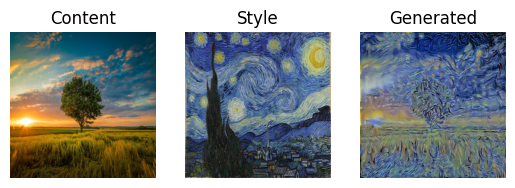

In [21]:

content_image = image_loader( content_url)
style_image = image_loader( style_url)

generated_image, history = run(
    cnn,
    content_image,
    style_image,
    num_steps=300,
    content_layers=['conv_4'],
    style_layers=['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5'],
    style_weight= 1e6,
    content_weight=1,
    generated_image_init='copy'
)

tensors_show(
    [content_image, style_image, generated_image],
    titles=['Content', 'Style', 'Generated']
)

- Plot the generated image using a function that we defined before

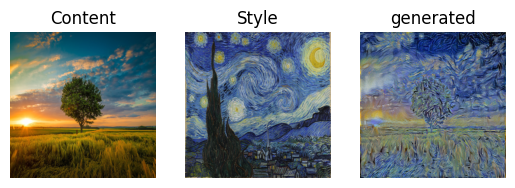

In [28]:
img_nst = generated_image.squeeze(0).detach().cpu().numpy()
tensors_show(
    [content_image, style_image,generated_image ], 
    titles=['Content', 'Style', "generated"]
)

We will display the history and content loss

* Analyze what you see

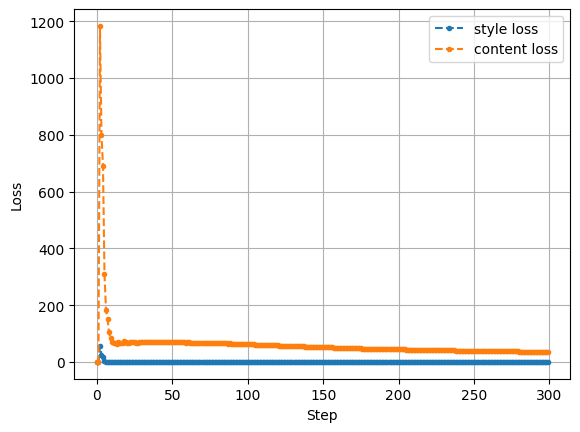

In [29]:
history_content = [cl.detach().cpu().numpy() for (cl, sl) in history]
history_style = [sl.detach().cpu().numpy() for (cl, sl) in history]



plt.plot(history_style, '.--', label='style loss')
plt.plot(history_content, '.--', label='content loss')
#plt.set_xlabel('Step')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Now for your personnal understanding, try to change the style weight and content weight value. 
* What do you observe ?

### Tensorboard

In [33]:
%reload_ext tensorboard

In [34]:
%tensorboard --logdir runs/nst

Launching TensorBoard...

# III - Conclusion

In fact, the goal of this lab is to make you use DL Network and Code.

Normally, you might have an intuition of what happens in the model during this style transfer process. In fact, the more you go through the layers of your model, the higher the features will be. What does it mean ? It means that the more you step into your model, the more you'll see object part (eyes, dog booty, cup of tea...). That also means that the model understands the input image by 'seeing' the objects. These features are used for classification. This also means that the first layers will be low level features (edge...), aka feature extraction.

By accessing the intermediate layers, we are able to have a compromise between extracted features and image understanding, allowing us to describe the content and the style of the input images.

Well Done !

<img src="https://media0.giphy.com/media/l0ErFafpUCQTQFMSk/giphy.gif">